# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [18]:
import numpy as np
import pandas as pd
data = pd.read_csv("data.csv")
u = []
f = []
for i in data["plans_universitypast_failures"]:
    u.append(i // 10)
    f.append(i % 10)
data.pop("plans_universitypast_failures")
data["plans_university"] = u
data["past_failures"] = f
data.head(10)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0
5,17,2,4,1,2,4,3,2.0,1.0,1.0,5,0,1,1,1,1,1,0
6,15,1,1,3,2,4,2,1.0,1.0,2.0,2,0,0,0,1,1,1,0
7,15,3,3,1,4,4,3,3.0,1.0,1.0,4,0,1,0,0,1,1,0
8,19,1,1,3,1,4,4,4.0,3.0,3.0,5,1,0,0,1,1,1,1
9,17,1,1,1,3,4,3,2.0,1.0,2.0,4,0,1,1,1,1,1,0


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [19]:
#print((data.mean() * 100 // 10) / 10)
data = data.replace(np.NaN, (data.mean() * 100 // 10) / 10)
print(data.loc[34])
data.head()

age                 18.0
Medu                 1.0
Fedu                 1.0
traveltime           2.0
studytime            3.0
famrel               5.0
freetime             3.0
goout                2.0
Dalc                 1.0
Walc                 2.2
health               4.0
sex_M                0.0
address_U            1.0
famsize_LE3          1.0
Pstatus_T            1.0
nursery              1.0
plans_university     1.0
past_failures        0.0
Name: 34, dtype: float64


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [23]:
for name in data.columns:
    for line in range(len(data[name])):
        data.loc[line, name] = (data.loc[line, name] - data[name].min()) / (data[name].max() - data[name].min())

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.765561,0.603961,0.555810,0.361321,0.458170,0.735077,0.591666,0.593326,0.277662,0.423857,0.665219,0.41440,0.687127,0.318868,0.851996,0.788822,0.928666,0.060590,0.862638,0.058468
std,0.212938,0.302206,0.290305,0.201591,0.229741,0.258112,0.248557,0.266099,0.192623,0.266785,0.322719,0.47481,0.444649,0.447128,0.329682,0.386311,0.230993,0.167291,0.165600,0.193730
min,0.004165,0.000000,0.000000,0.092341,0.092708,0.077135,0.077135,0.077135,0.076307,0.077135,0.077135,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.761858,0.250000,0.250000,0.232277,0.232205,0.593733,0.390599,0.390599,0.187602,0.187465,0.390599,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812500,0.000000
50%,0.809486,0.500000,0.500000,0.232277,0.488137,0.796866,0.593733,0.593733,0.187602,0.390599,0.796866,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.937500,0.000000
75%,0.857115,1.000000,0.750000,0.488185,0.488137,1.000000,0.796866,0.796866,0.390701,0.593733,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

scores = pd.read_csv("scores.csv")
kf = KFold(n_splits=4)
data1 = data.to_numpy()
scores1 = scores.to_numpy()
for train, test in kf.split(scores):
    x_tr, x_test, y_tr, y_test = data1[train], data1[test], scores1[train], scores1[test]
    reg = LinearRegression().fit(x_tr, y_tr)
    y_pred = reg.predict(x_test)
    rmse = 0
    for i in range(len(y_test)):
        rmse += (y_test[i] - y_pred[i]) * (y_test[i] - y_pred[i])
    rmse = (rmse / len(y_test)) ** 0.5
    print(rmse)

[15.87155743]
[18.61728844]
[17.38629888]
[17.65332447]


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [21]:
from numpy import loadtxt

attendance = pd.read_csv("attendance.csv", sep = ';')
school_support = (open("school_support.txt")).read().split('\n')
data['attendance'] = 1 - (attendance.isnull().sum (axis= 1) / attendance.shape[1])
col = [0] * data.shape[0]
for el in school_support:
    if el != '':
        col[int(float(el))] = 1
data['school_support'] = col

scores1 = scores.to_numpy()
data1 = data.to_numpy()

kf = KFold(n_splits=4)
for train, test in kf.split(scores):
    X_train, X_test, y_train, y_test = data1[train], data1[test], scores1[train], scores1[test]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = 0
    for i in range(len(y_test)):
        rmse += (y_test[i] - y_pred[i]) * (y_test[i] - y_pred[i])
    rmse = (rmse / len(y_test)) ** 0.5
    
    print("Точность модели: ", rmse)

Точность модели:  [15.90466793]
Точность модели:  [18.60490388]
Точность модели:  [17.65635134]
Точность модели:  [17.84562945]


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

C:\Users\1\AppData\Local\Temp\ipykernel_6056\2820165696.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.164869029275806' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["age"] > 22] = data["age"].mean()
C:\Users\1\AppData\Local\Temp\ipykernel_6056\2820165696.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.164869029275806' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["age"] > 22] = data["age"].mean()
C:\Users\1\AppData\Local\Temp\ipykernel_6056\2820165696.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.164869029275806' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data

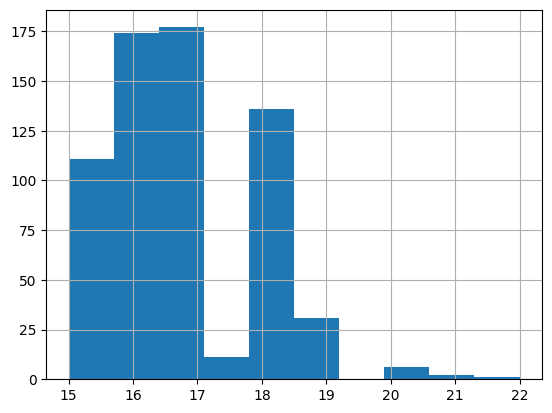

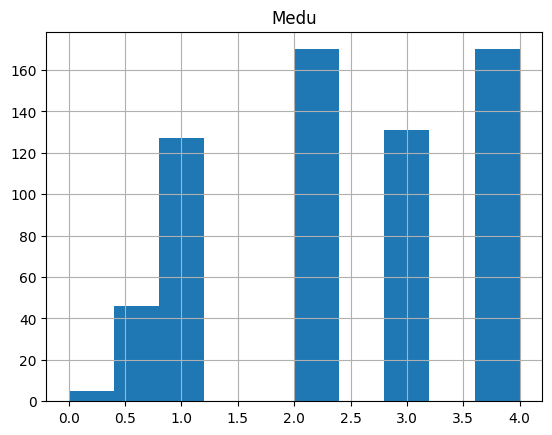

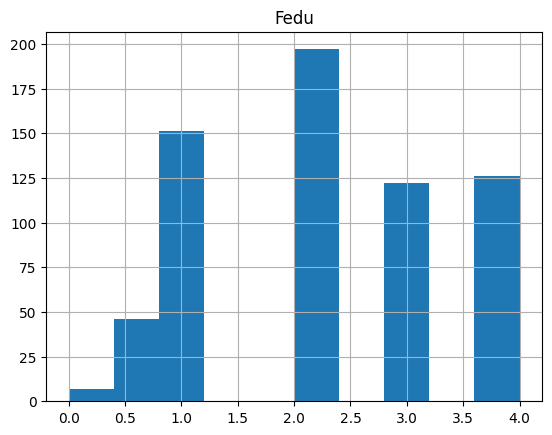

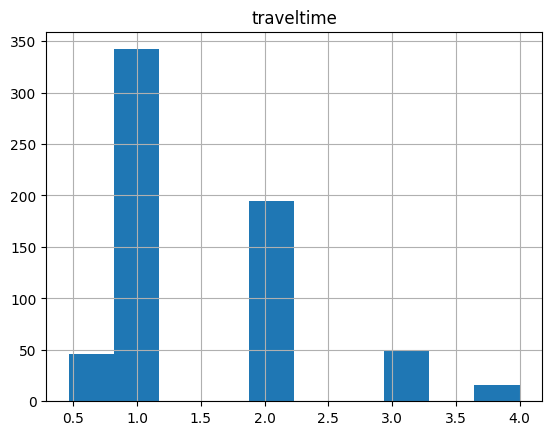

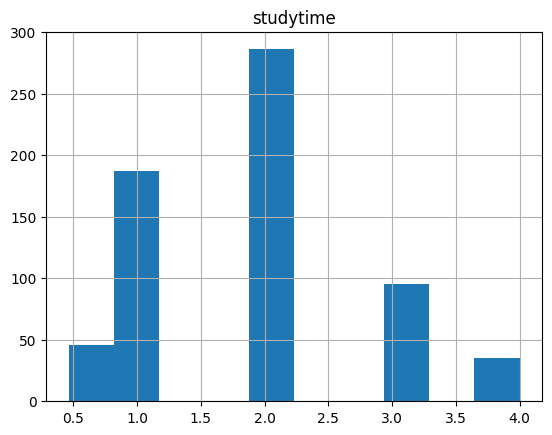

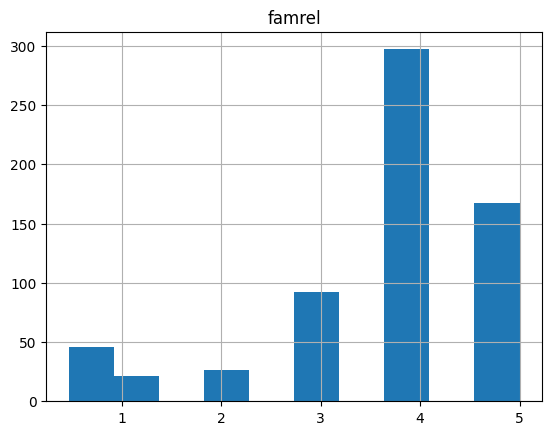

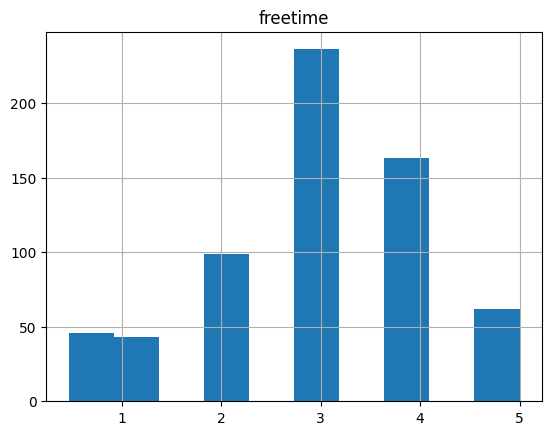

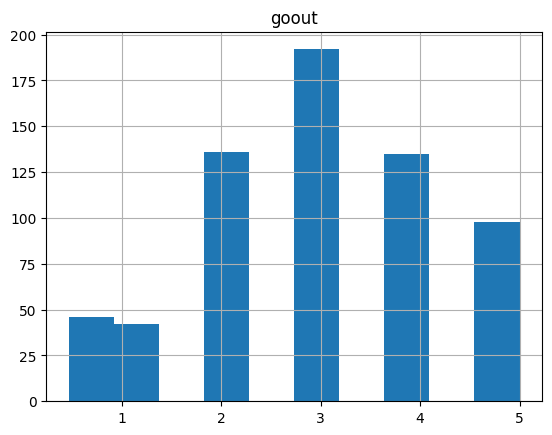

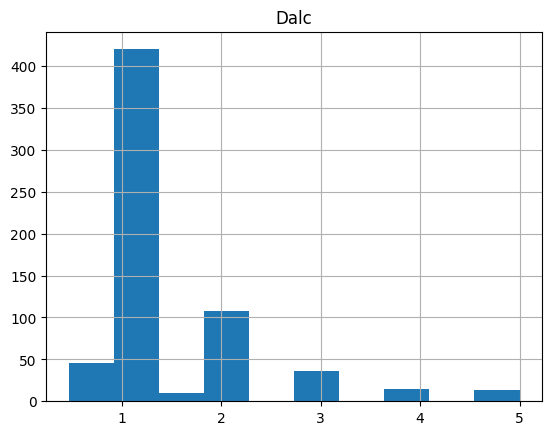

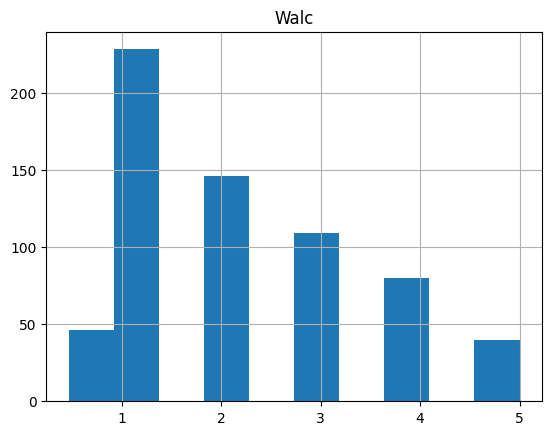

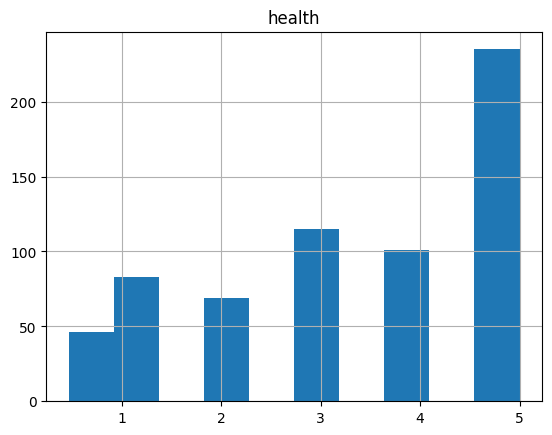

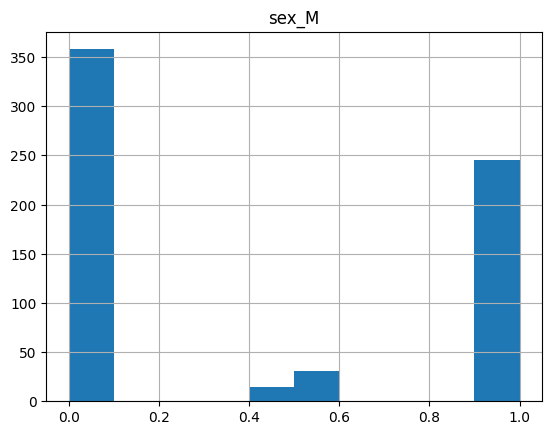

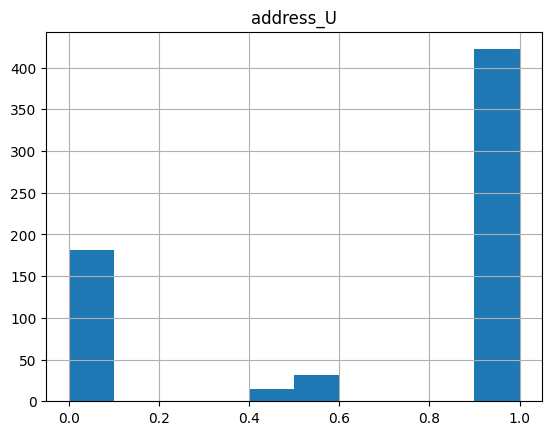

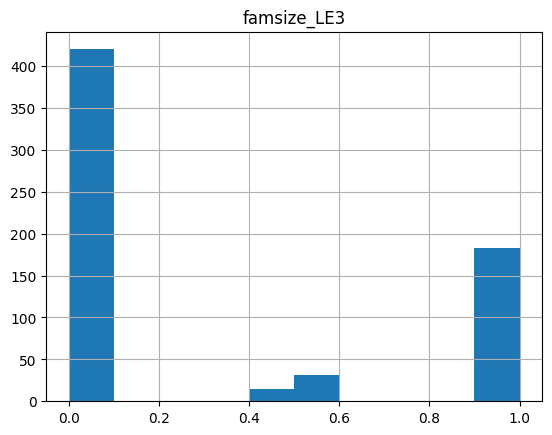

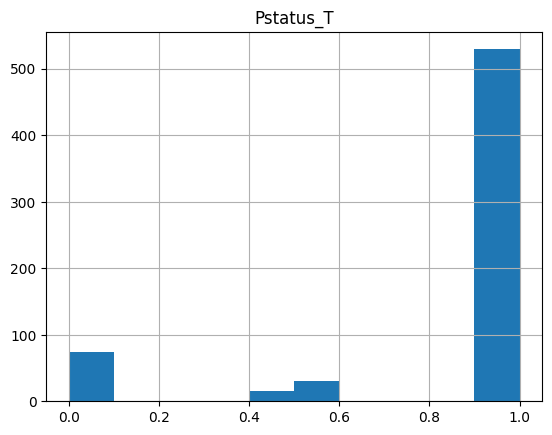

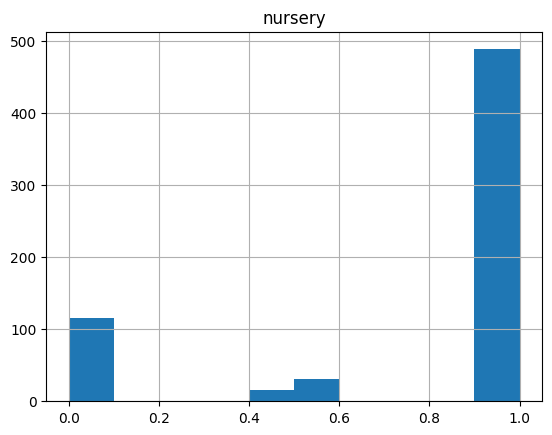

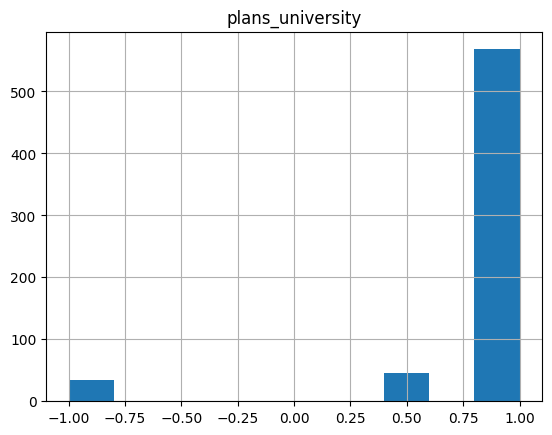

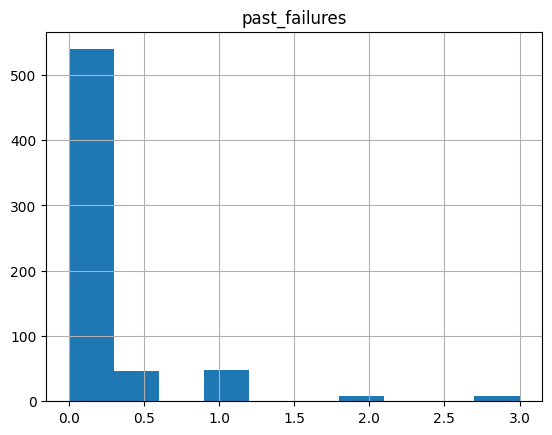

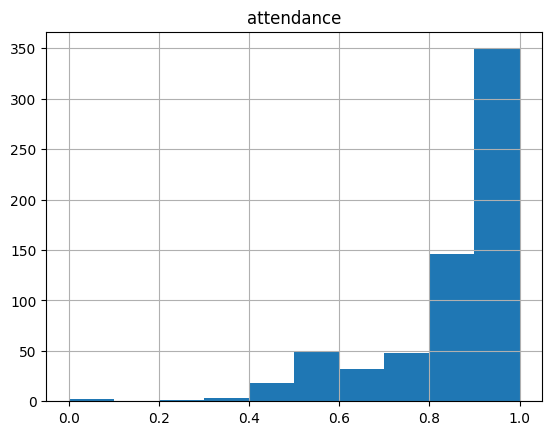

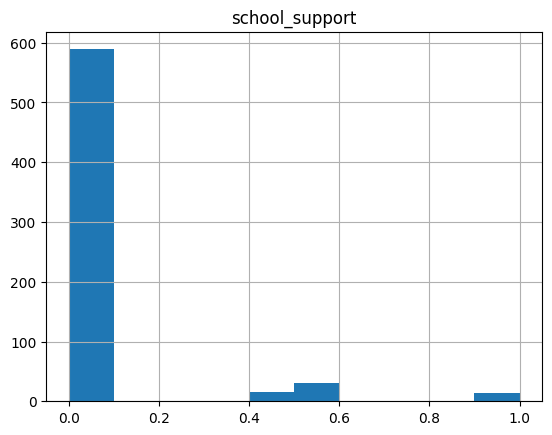

In [22]:
for i in range(3):
    data.loc[data["age"] > 22] = data["age"].mean()
    data.loc[data["age"] < 12] = data["age"].mean()
data['age'].hist()
for name in data.columns:
    if name == 'age':
        mx = 22
    elif name in ['Medu', 'Fedu', 'traveltime', 'studytime']:
        mx = 4
    elif name in ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']:
        mx = 5
    elif name in ['sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'nursery', 'plans_university', 'support_school']:
        mx = 1
    elif name == 'past_failures':
        mx = 3
    elif name == 'attendance':
        mx = 35
    for i in range(3):
        data.loc[data[name] > mx] = data[name].mean()
for name in data.columns:
    if name != 'age':
        data.hist(column=name)

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

<BarContainer object of 649 artists>

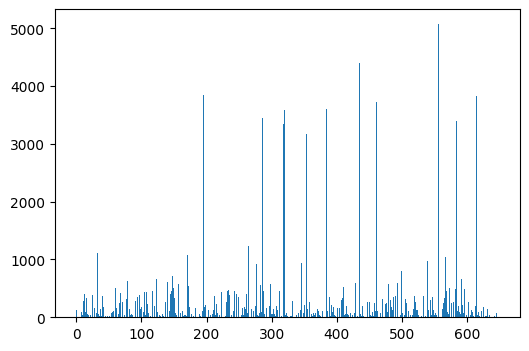

In [30]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
reg = linear_model.LinearRegression().fit(data[:len(data) - 1], scores)

data1 = data.to_numpy()
scores1 = scores.to_numpy()
predict = [0] * len(data)

for i in range(len(data[:len(data) - 1])):
    test = [i]
    X_test, y_test = data1[test], scores1[test]
    prediction = model.predict(X_test)[0][0]
    error = (prediction - y_test[0][0]) ** 2
    predict[i] = error
 
a = plt.figure(figsize=(6, 4)).add_subplot()
a.bar([i for i in range(len(predict))], predict)

In [31]:
ind = []
for i in range(len(predict)):
    if predict[i] > 1500:
        ind.append(i)
data = data.drop(ind)
scores = scores.drop(ind)

data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
0,0.756538,1.00,1.00,0.151845,0.434563,1.000000,0.779594,0.779594,0.118378,0.338783,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.8125,1.0
1,0.805230,1.00,1.00,0.220406,0.158588,1.000000,0.559189,0.779594,0.180600,0.356391,1.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.9375,0.0
2,0.756538,0.25,0.25,0.480270,0.219037,0.779594,1.000000,1.000000,0.385450,0.785464,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0000,0.0
3,0.853923,0.25,0.50,0.480270,0.219037,0.559189,0.779594,0.779594,0.385450,0.785464,0.779594,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.6875,0.0
4,0.805230,0.50,0.25,0.480270,0.479358,0.779594,0.338783,1.000000,0.180600,0.356391,1.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0000,0.0


### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [32]:
kf = KFold(n_splits=4)

data1 = data.to_numpy()
scores1 = scores.to_numpy()

for train, test in kf.split(scores):
    X_train, X_test, y_train, y_test = data1[train], data1[test], scores1[train], scores1[test]
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = 0
    for i in range(len(y_test)):
        rmse += (y_test[i] - y_pred[i]) * (y_test[i] - y_pred[i])
    rmse = (rmse / len(y_test)) ** 0.5
    print(rmse)

[16.48463566]
[13.67175016]
[12.05767964]
[13.84549308]


Качество обучения модели улучшалось после исправления выбросов и сломанных данных.
Также модель обучалась качественнее при добавлении новых признаков.